<a href="https://colab.research.google.com/github/anshikawasthi/basketball/blob/main/car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

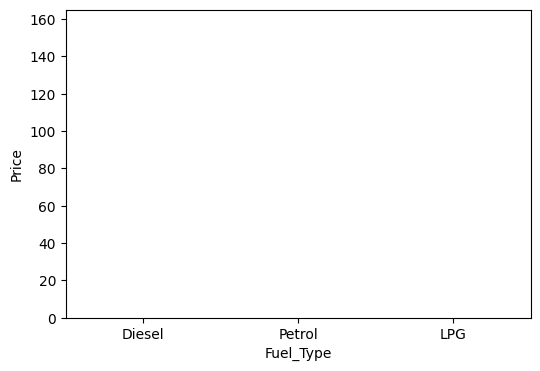



 x shape : 
 (50, 11)

Iteration 1: Linear Regression Accuracy = 1.0000, Random Forest Accuracy = 0.9996

Iteration 2: Linear Regression Accuracy = 1.0000, Random Forest Accuracy = 1.0000

Iteration 3: Linear Regression Accuracy = 1.0000, Random Forest Accuracy = 0.9988

Iteration 4: Linear Regression Accuracy = 1.0000, Random Forest Accuracy = 0.9997

Iteration 5: Linear Regression Accuracy = 1.0000, Random Forest Accuracy = 0.9991

Iteration 6: Linear Regression Accuracy = 1.0000, Random Forest Accuracy = 0.9979

Iteration 7: Linear Regression Accuracy = 1.0000, Random Forest Accuracy = 0.9994

Iteration 8: Linear Regression Accuracy = 1.0000, Random Forest Accuracy = 0.9921

Iteration 9: Linear Regression Accuracy = 1.0000, Random Forest Accuracy = 0.9995

Iteration 10: Linear Regression Accuracy = 1.0000, Random Forest Accuracy = 0.9974

Iteration 11: Linear Regression Accuracy = 1.0000, Random Forest Accuracy = 0.9977

Iteration 12: Linear Regression Accuracy = 1.0000, Random Fo

In [ ]:
# Importing packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the training data
train_data = pd.read_csv("train-data.csv")
test_data = pd.read_csv("test-data.csv")

# Visualize the relationship between 'Fuel_Type' and 'Price'
var = 'Fuel_Type'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(x=var, y="Price", data=data)
ax.set_ylim(0, 165)
plt.show()

# Load updated dataset for model building
data = pd.read_csv("updatedataset.csv")
x = data[['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
          'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)',
          'Diesel', 'LPG', 'Petrol', 'Manual']]
y = data['Price']

print("\n\n x shape : \n", x.shape)

x = np.array(x)
y = np.array(y)

# Initialize models
linear_regression = LinearRegression()
rf_regression = RandomForestRegressor()

# Train and evaluate models
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)

    # Linear Regression
    linear_regression.fit(x_train, y_train)
    acc_lr = linear_regression.score(x_test, y_test)

    # Random Forest Regression
    rf_regression.fit(x_train, y_train.ravel())
    acc_rf = rf_regression.score(x_test, y_test)

    print(f"\nIteration {i + 1}: Linear Regression Accuracy = {acc_lr:.4f}, Random Forest Accuracy = {acc_rf:.4f}")

# Save models using pickle
with open("lr.pickle", "wb") as pickellr:
    pickle.dump(linear_regression, pickellr)

with open("randomforest.pickle", "wb") as picklerf:
    pickle.dump(rf_regression, picklerf)

# Load saved models and make predictions
pred_data = pd.read_csv("pred.csv")
x_pred = np.array(pred_data)

# Linear Regression Prediction
with open("lr.pickle", "rb") as pickellr:
    pickle_lr = pickle.load(pickellr)
    lr_predictions = pickle_lr.predict(x_pred)
    print("\nLinear Regression Predictions:", lr_predictions)

# Random Forest Prediction
with open("randomforest.pickle", "rb") as picklerf:
    pickle_rf = pickle.load(picklerf)
    rf_predictions = pickle_rf.predict(x_pred)
    print("\nRandom Forest Predictions:", rf_predictions)
